In [391]:
#importing required libraries for this case study
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('max_info_columns',500)

In [392]:
#Importing the applications data file 
applications=pd.read_csv('/Users/suraajhasija/Desktop/Python-Basics/EDA Case Study/application_data.csv')

In [4]:
#basic data checks 
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
#checking the shape of the dataframe
applications.shape

(307511, 122)

In [394]:
#to check null percentage
xx=applications.isnull().sum()/len(applications.index)*100
xx

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [395]:
#dropping columns with null % greater than 50%
cols_to_drop=xx[xx>50].index

In [396]:
app=applications.drop(columns=cols_to_drop)

In [13]:
#Now again checking the percentage of missing values
app.isnull().sum()/len(applications.index)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [397]:
#checking for categorical and continuous data
app.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE               

In [400]:
#Checking the categorical colums before imputation of columns with less % of null values (~13%)
app['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [15]:
#Calculating the mode
app_AMT_REQ_CREDIT_BUREAU_HOUR=app['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]
app_AMT_REQ_CREDIT_BUREAU_DAY=app['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]
app_AMT_REQ_CREDIT_BUREAU_WEEK=app['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]
app_AMT_REQ_CREDIT_BUREAU_MON=app['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]
app_AMT_REQ_CREDIT_BUREAU_QRT=app['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]
app_AMT_REQ_CREDIT_BUREAU_YEAR=app['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]


In [16]:
#Reporting the mode
print(app_AMT_REQ_CREDIT_BUREAU_HOUR)
print(app_AMT_REQ_CREDIT_BUREAU_DAY)
print(app_AMT_REQ_CREDIT_BUREAU_WEEK)
print(app_AMT_REQ_CREDIT_BUREAU_MON)
print(app_AMT_REQ_CREDIT_BUREAU_QRT)
print(app_AMT_REQ_CREDIT_BUREAU_YEAR)

#only reporting and no imputing
#app.loc[app['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(),'AMT_REQ_CREDIT_BUREAU_DAY']=app_AMT_REQ_CREDIT_BUREAU_DAY

0.0
0.0
0.0
0.0
0.0
0.0


In [17]:
#treating others columns as well (for mode imputation) 
app_name_type_suite=app['NAME_TYPE_SUITE'].mode()
print(app_name_type_suite)

##### do for remaining as well?

0    Unaccompanied
dtype: object


In [18]:
# checking the data types of the columns
app.dtypes   


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [20]:
#outlier in AMT_INCOME_TOTAL
app.AMT_INCOME_TOTAL.quantile([0.25,0.5,.75,.95,.99,1])
# Outlier Value= 117Mn 

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

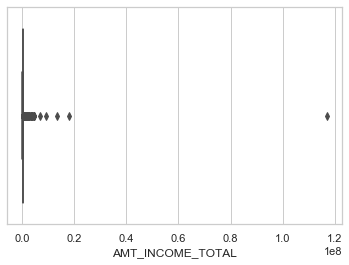

In [401]:
#Visualization (BoxPlot) to check outliers in AMT_INCOME_TOTAL
sbn.boxplot(app.AMT_INCOME_TOTAL)

In [402]:
# to check outliers in AMT_CREDIT
app.AMT_CREDIT.quantile([0.25,0.5,.75,.95,.99,1])

0.25     270000.0
0.50     513531.0
0.75     808650.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

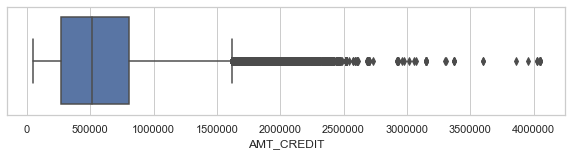

In [403]:
# Visualization (BoxPlot) to check outliers in AMT_CREDIT
plt.figure(figsize=[10,2])
sbn.boxplot(app.AMT_CREDIT)
plt.show()

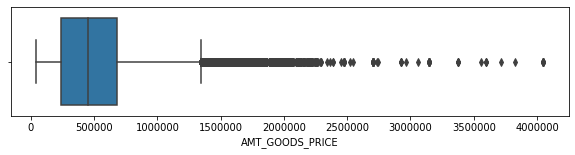

In [24]:
plt.figure(figsize=[10,2])
sbn.boxplot(app['AMT_GOODS_PRICE'])

In [25]:
app.AMT_GOODS_PRICE.quantile([0.25,0.5,.75,.95,.99,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [208]:
#Treating the outliers
appl=app[(app.AMT_CREDIT<=1854000) & (app.AMT_GOODS_PRICE<4050000) & (app.AMT_INCOME_TOTAL<=472500)]

In [209]:
#Analysing AMT_GOODS_PRICE after removing the outliers
appl.AMT_GOODS_PRICE.quantile([0.25,0.5,.75,.95,.99,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.95    1152000.0
0.99    1575000.0
1.00    1854000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [210]:
#Analysing AMT_CREDIT after removing the outliers
appl.AMT_CREDIT.quantile([0.25,0.5,.75,.95,.99,1])

0.25     270000.0
0.50     508495.5
0.75     807984.0
0.95    1305000.0
0.99    1649376.0
1.00    1854000.0
Name: AMT_CREDIT, dtype: float64

In [211]:
#Analysing AMT_INCOME_TOTAL after removing the outliers
appl.AMT_INCOME_TOTAL.quantile([0.25,0.5,.75,.95,.99,1])

0.25    112500.0
0.50    144000.0
0.75    202500.0
0.95    315000.0
0.99    422676.0
1.00    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [212]:
# dropping unnecessary columns
appl.drop(columns=appl.columns[33:39],inplace=True)
appl.drop(columns=appl.columns[34:69],inplace=True)

/Users/suraajhasija/anaconda3/envs/suraaj/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [213]:
appl.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,0.0,0.0


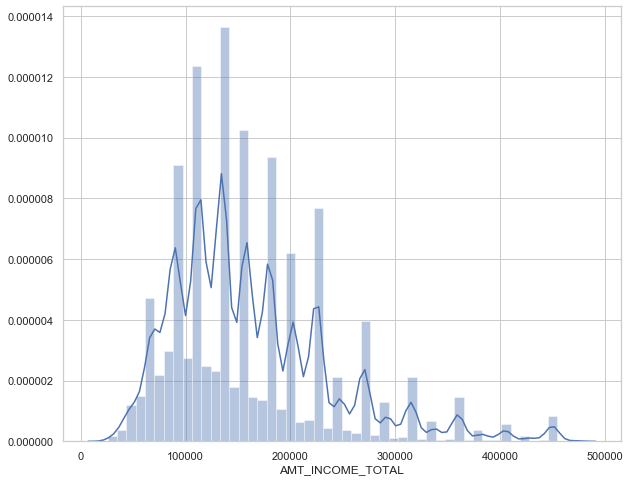

In [214]:
#Binning- Dividing income into groups
plt.figure(figsize=[10,8])
sbn.distplot(appl.AMT_INCOME_TOTAL)

1) if the distribution is approximately symmetrical (mainly if average similar to mode) and 
there are no outliers, the cut-off values are given by mean value - 0.25* standard deviation; mean value ± standard deviation* 0.25;

2) if the distribution is clearly asymmetric or if there are outliers, the cut-off values are given by: median - 0.25* interquartile range; median +0.25 * interquartile range.


In [215]:
income_med=appl.AMT_INCOME_TOTAL.median()
income_quant=appl.AMT_INCOME_TOTAL.quantile(.25)
low_income=income_med-income_quant
high_income=income_med+income_quant
print(low_income)
print(high_income)

31500.0
256500.0


In [216]:
#Binning of continuous variables 

appl.loc[appl['AMT_INCOME_TOTAL']<low_income,'INCOME_GROUP']='low income'
appl.loc[(appl['AMT_INCOME_TOTAL']>=low_income) & (appl['AMT_INCOME_TOTAL']<high_income) ,'INCOME_GROUP']='average income'
appl.loc[appl['AMT_INCOME_TOTAL']>=high_income,'INCOME_GROUP']='high income'

/Users/suraajhasija/anaconda3/envs/suraaj/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/suraajhasija/anaconda3/envs/suraaj/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


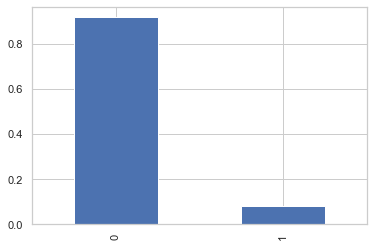

In [408]:
#Checking for Imbalance percentage
appl['TARGET'].value_counts(normalize=True).plot.bar()


In [406]:
#Checking for Imbalance percentage
appl['TARGET'].value_counts(normalize=True)*100

0    91.864348
1     8.135652
Name: TARGET, dtype: float64

In [218]:
appl['TARGET'].value_counts()

0    277005
1     24532
Name: TARGET, dtype: int64

In [219]:
#Dividing the data into two subsets based on targets
applT1=appl[appl['TARGET']==1]
applT0=appl[appl['TARGET']==0]

In [220]:
#to check categorical and non categorical data
appl.nunique()

SK_ID_CURR                     301537
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2281
AMT_CREDIT                       5213
AMT_ANNUITY                     13123
AMT_GOODS_PRICE                   902
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17459
DAYS_EMPLOYED                   12524
DAYS_REGISTRATION               15678
DAYS_ID_PUBLISH                  6166
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

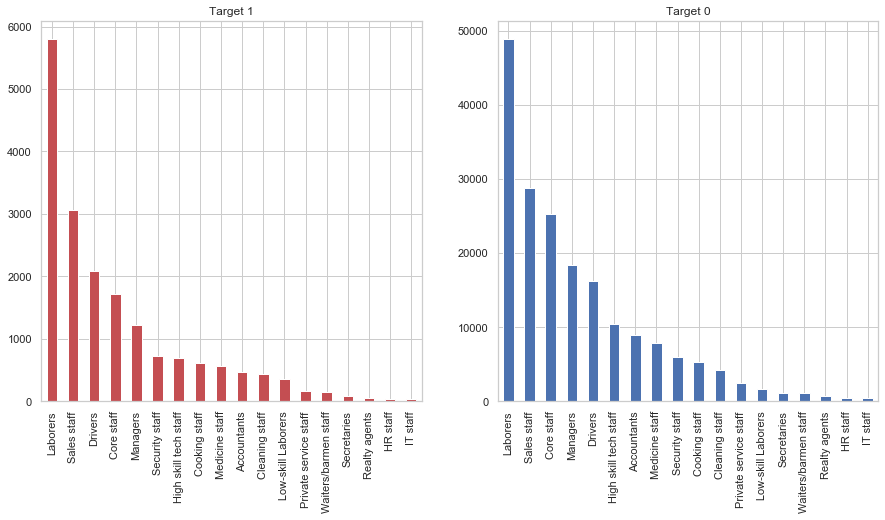

<Figure size 432x288 with 0 Axes>

In [221]:
#Plot for Occupation Type
#Univariate analysis of categorical data
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


applT1['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='r')
plt.title('Target 1')

plt.subplot(1, 2, 2)
applT0['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)

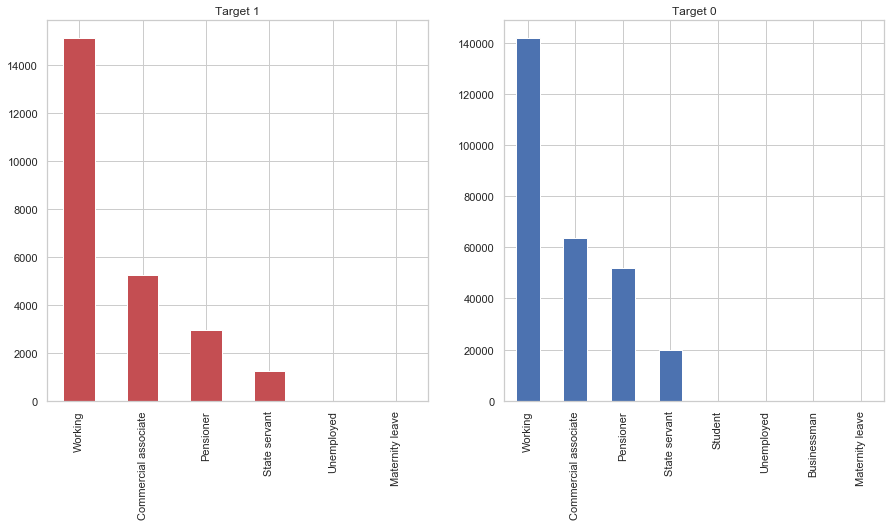

<Figure size 432x288 with 0 Axes>

In [222]:
#Plot for Income Type
#univariate - categorical analysis
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


applT1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='r')
plt.title('Target 1')

plt.subplot(1, 2, 2)
applT0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)

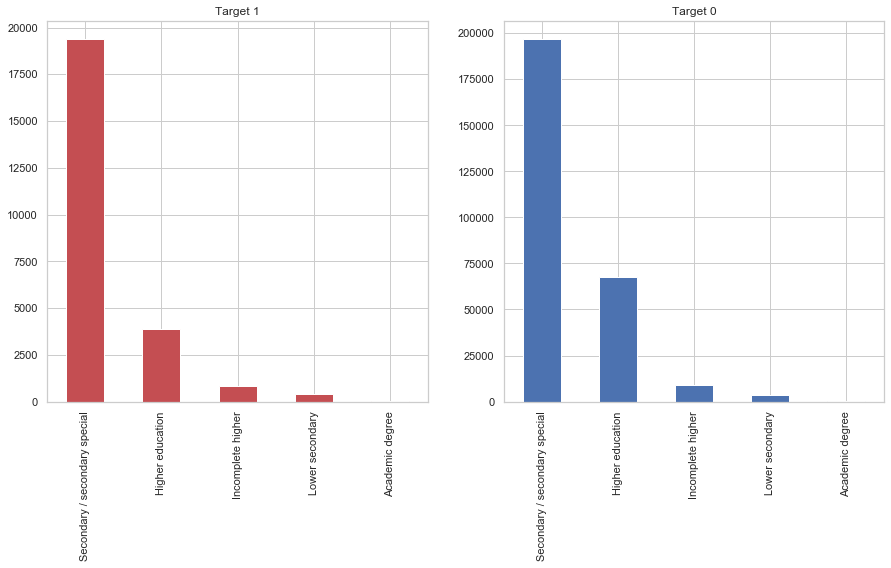

<Figure size 432x288 with 0 Axes>

In [223]:
#Plot for Education Type
#univariate - categorical analysis
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


applT1['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='r')
plt.title('Target 1')

plt.subplot(1, 2, 2)
applT0['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)

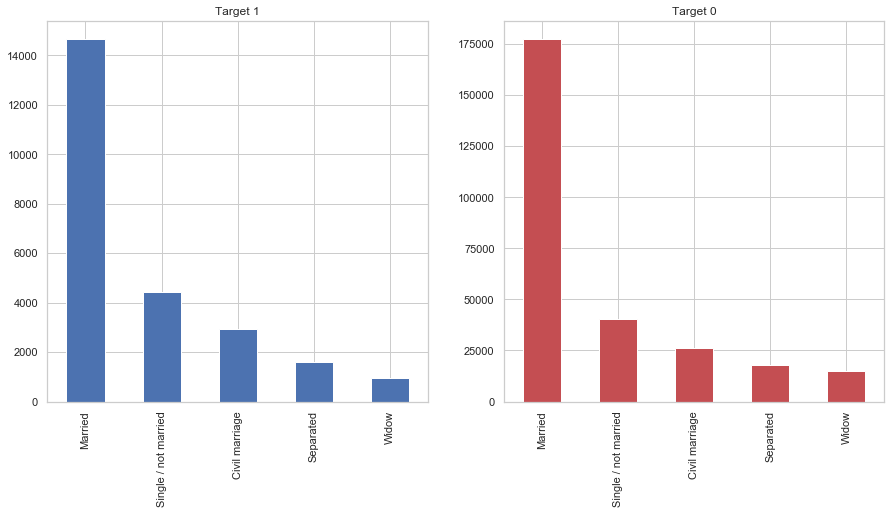

<Figure size 432x288 with 0 Axes>

In [224]:
#Plot for family status
#univariate - categorical analysis
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


applT1['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Target 1')

plt.subplot(1, 2, 2)
applT0['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending=False).plot.bar(color='r')
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)

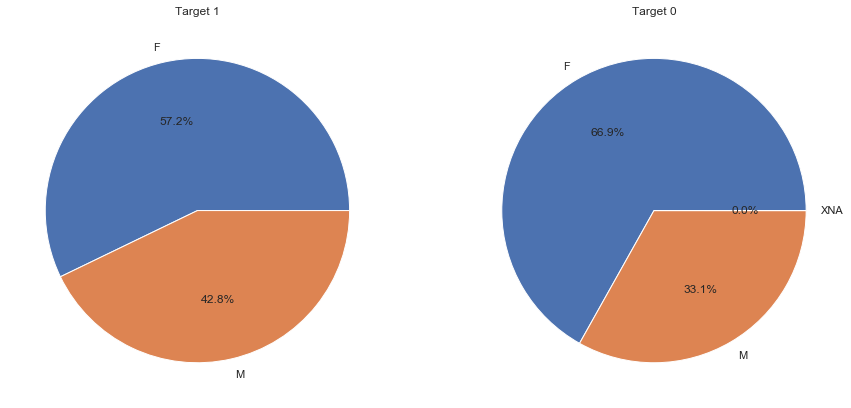

<Figure size 432x288 with 0 Axes>

In [226]:
#Population composition (Gendee- univariate analysis)
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


#applT1['CODE_GENDER'].value_counts().sort_values(ascending=False).plot.bar(color='r')
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True), autopct = '%1.1f%%', labels= applT1['CODE_GENDER'].value_counts().index )
plt.title('Target 1')

plt.subplot(1, 2, 2)
plt.pie(applT0['CODE_GENDER'].value_counts(normalize=True), autopct = '%1.1f%%', labels= applT0['CODE_GENDER'].value_counts().index )

plt.title('Target 0')
plt.show()
plt.tight_layout(fig)

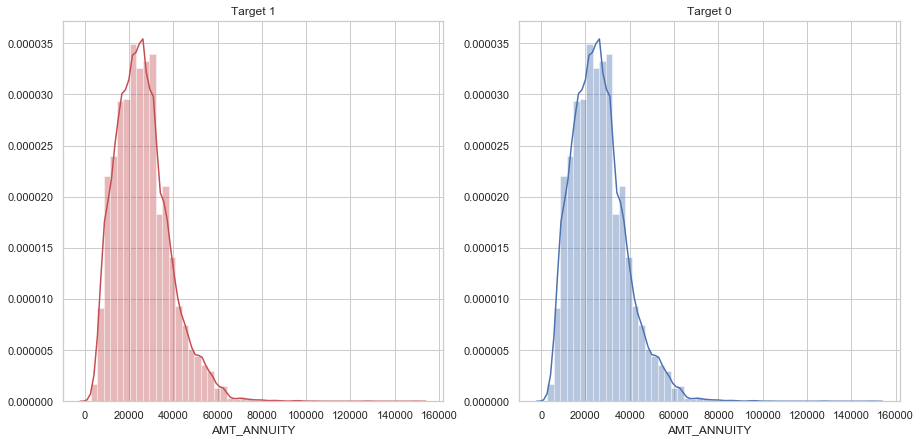

<Figure size 432x288 with 0 Axes>

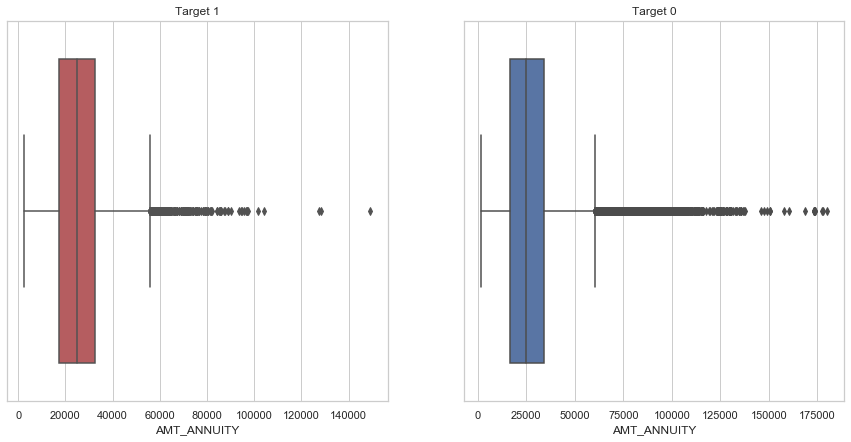

<Figure size 432x288 with 0 Axes>

In [227]:
#univariate analysis of Annuity (distplot or boxplots)


fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


sbn.distplot(applT1['AMT_ANNUITY'], color='r')
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
#plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True) )
plt.title('Target 1')

plt.subplot(1, 2, 2)
sbn.distplot(applT1['AMT_ANNUITY'])
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)


fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


sbn.boxplot(applT1['AMT_ANNUITY'], color='r')
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
#plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True) )
plt.title('Target 1')

plt.subplot(1, 2, 2)
sbn.boxplot(applT0['AMT_ANNUITY'])
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)




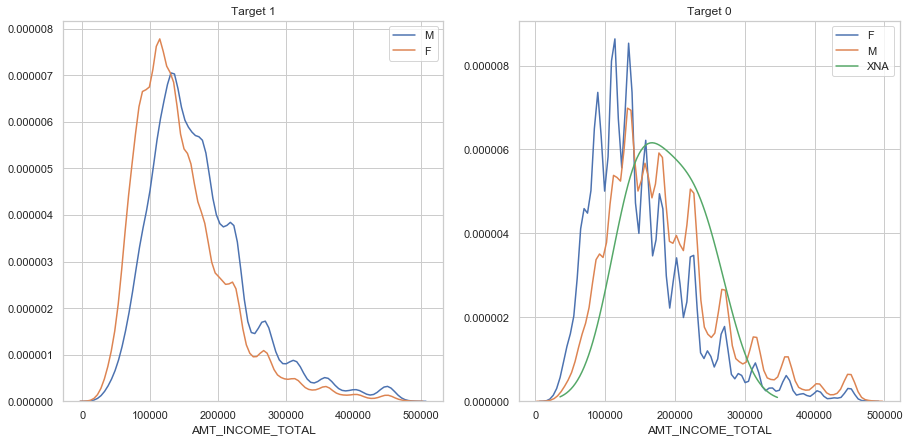

<Figure size 432x288 with 0 Axes>

In [228]:
#density plot for income total by gender in current application
#univariate - continuous analysis

fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


for i in applT1['CODE_GENDER'].unique():
    subset=applT1[applT1['CODE_GENDER']==i]
    sbn.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label=i)
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
#plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True) )
plt.title('Target 1')




plt.subplot(1, 2, 2)

for i in applT0['CODE_GENDER'].unique():
    subset=applT0[applT0['CODE_GENDER']==i]
    sbn.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label=i)
    
plt.title('Target 1')

plt.title('Target 0')
plt.show()
plt.tight_layout(fig)




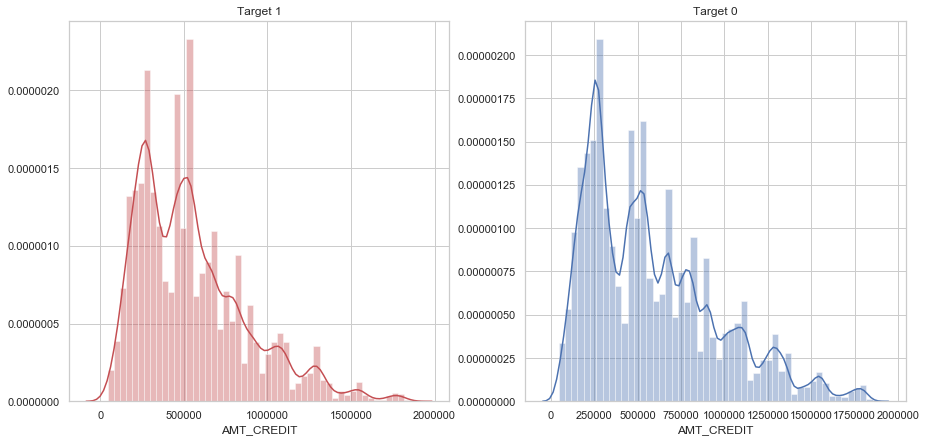

<Figure size 432x288 with 0 Axes>

In [229]:
#density plot for credit amount in current application
#univariate - continuous analysis

fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


sbn.distplot(applT1['AMT_CREDIT'], color='r')
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
#plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True) )
plt.title('Target 1')

plt.subplot(1, 2, 2)
sbn.distplot(applT0['AMT_CREDIT'])
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)



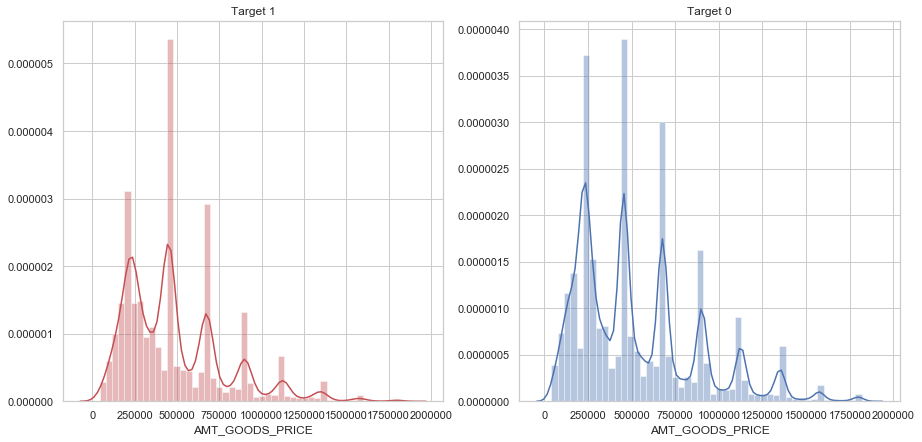

<Figure size 432x288 with 0 Axes>

In [404]:
#density plot for goods price in current application
#univariate - continuous analysis
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
sbn.distplot(applT1['AMT_GOODS_PRICE'], color='r')
plt.title('Target 1')

plt.subplot(1, 2, 2)
sbn.distplot(applT0['AMT_GOODS_PRICE'])
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)



In [231]:
#Filling NA occupation type with unknown
applT1['OCCUPATION_TYPE']=applT1['OCCUPATION_TYPE'].fillna('Unknown')
applT0['OCCUPATION_TYPE']=applT0['OCCUPATION_TYPE'].fillna('Unknown')

<ipython-input-231-e79e8ae3b5b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applT1['OCCUPATION_TYPE']=applT1['OCCUPATION_TYPE'].fillna('Unknown')
<ipython-input-231-e79e8ae3b5b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applT0['OCCUPATION_TYPE']=applT0['OCCUPATION_TYPE'].fillna('Unknown')


Text(0.5, 1.0, 'Target 0')

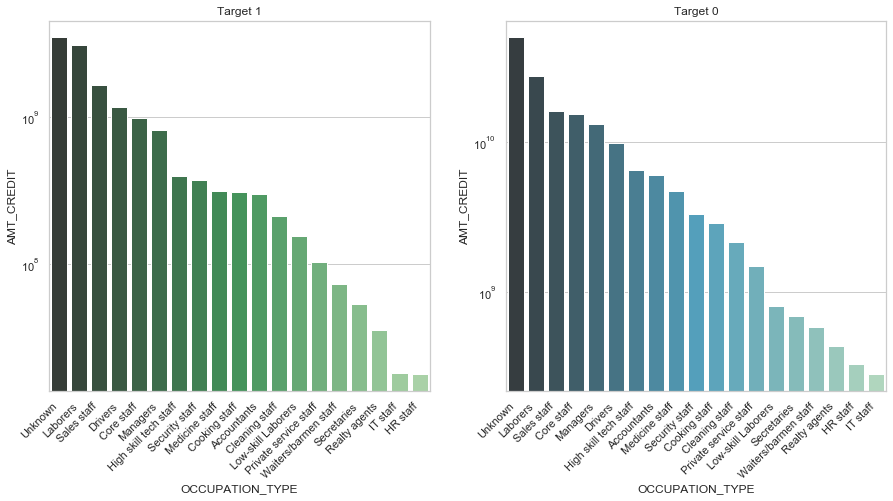

In [232]:
#bivariate analysis of AMT_CREDIT and Occupation Type
#categorical- continuous

plt.figure(figsize=[15,15])
sbn.set(style="whitegrid", color_codes=True)
plt.subplot(2, 2, 1)


#chart= sbn.barplot(y=applT1['AMT_ANNUITY'],x=applT1['OCCUPATION_TYPE'],palette="Blues", )
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

m=applT1.groupby('OCCUPATION_TYPE').sum()['AMT_CREDIT'].sort_values(ascending=False).reset_index()
chart=sbn.barplot(y=m['AMT_CREDIT'],x=m['OCCUPATION_TYPE'], palette='Greens_d')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.yscale('log')
plt.title('Target 1')


plt.subplot(2, 2, 2)



n=applT0.groupby('OCCUPATION_TYPE').sum()['AMT_CREDIT'].sort_values(ascending=False).reset_index()
chart=sbn.barplot(y=n['AMT_CREDIT'],x=n['OCCUPATION_TYPE'], palette='GnBu_d')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.yscale('log')
plt.title('Target 0')


Text(0.5, 1.0, 'Target 0')

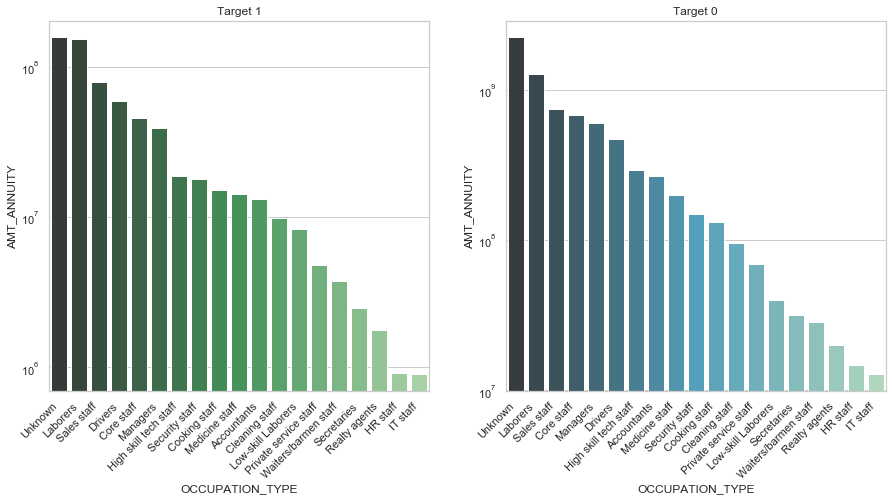

In [233]:
#bivariate analysis of Annuity and Occupation Type
#categorical- continuous

plt.figure(figsize=[15,15])
sbn.set(style="whitegrid", color_codes=True)

plt.subplot(2, 2, 1)


#chart= sbn.barplot(y=applT1['AMT_ANNUITY'],x=applT1['OCCUPATION_TYPE'],palette="Blues", )
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

m=applT1.groupby('OCCUPATION_TYPE').sum()['AMT_ANNUITY'].sort_values(ascending=False).reset_index()
chart=sbn.barplot(y=m['AMT_ANNUITY'],x=m['OCCUPATION_TYPE'], palette='Greens_d')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.yscale('log')

plt.title('Target 1')


plt.subplot(2, 2, 2)



n=applT0.groupby('OCCUPATION_TYPE').sum()['AMT_ANNUITY'].sort_values(ascending=False).reset_index()
chart=sbn.barplot(y=n['AMT_ANNUITY'],x=n['OCCUPATION_TYPE'], palette='GnBu_d')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.yscale('log')
plt.title('Target 0')

Text(0.5, 1.0, 'Target 0')

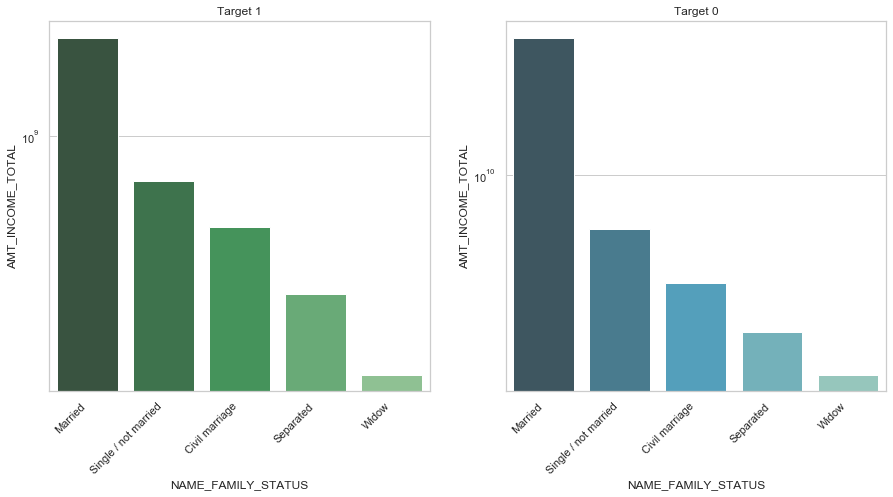

In [234]:
#bivariate analysis of INCOME and GENDER
#categorical- continuous

plt.figure(figsize=[15,15])
sbn.set(style="whitegrid", color_codes=True)

plt.subplot(2, 2, 1)


#chart= sbn.barplot(y=applT1['AMT_ANNUITY'],x=applT1['OCCUPATION_TYPE'],palette="Blues", )
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

m=applT1.groupby('NAME_FAMILY_STATUS').sum()['AMT_INCOME_TOTAL'].sort_values(ascending=False).reset_index()
chart=sbn.barplot(y=m['AMT_INCOME_TOTAL'],x=m['NAME_FAMILY_STATUS'], palette='Greens_d')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.yscale('log')

plt.title('Target 1')


plt.subplot(2, 2, 2)



n=applT0.groupby('NAME_FAMILY_STATUS').sum()['AMT_INCOME_TOTAL'].sort_values(ascending=False).reset_index()
chart=sbn.barplot(y=n['AMT_INCOME_TOTAL'],x=n['NAME_FAMILY_STATUS'], palette='GnBu_d')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.yscale('log')
plt.title('Target 0')

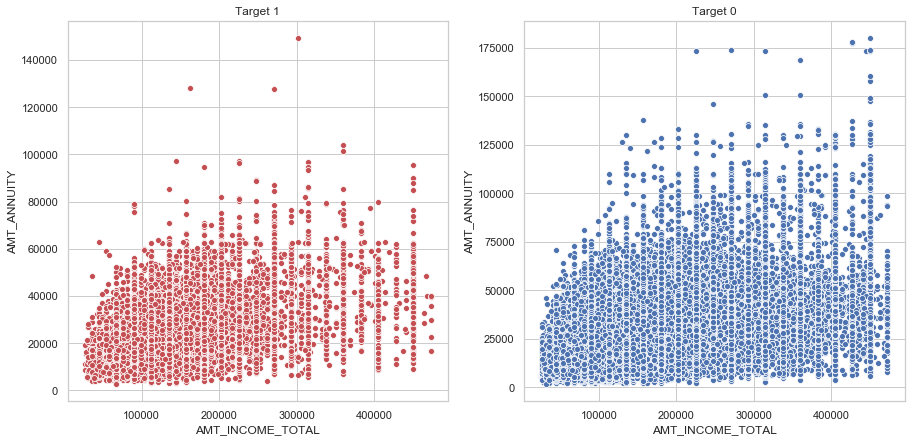

<Figure size 432x288 with 0 Axes>

In [235]:
#Bivariate Numerical analysis
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


sbn.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', data=applT1, color='r')
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
#plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True) )
plt.title('Target 1')

plt.subplot(1, 2, 2)
sbn.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', data=applT0, color='b')
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)




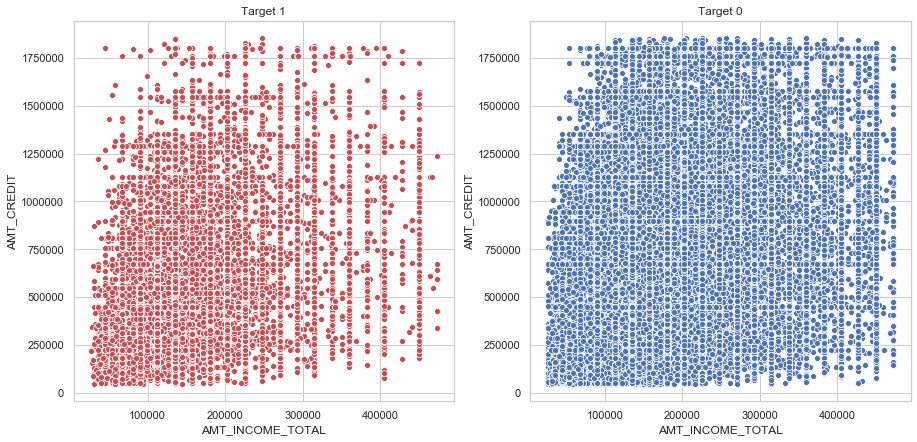

<Figure size 432x288 with 0 Axes>

In [236]:
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


sbn.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=applT1, color='r')
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
#plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True) )
plt.title('Target 1')

plt.subplot(1, 2, 2)
sbn.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=applT0, color='b')
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)



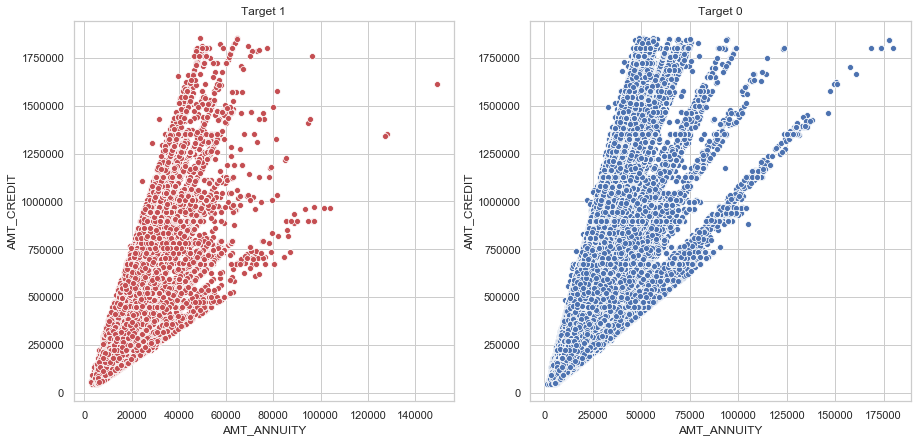

<Figure size 432x288 with 0 Axes>

In [237]:

fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


sbn.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', data=applT1, color='r')
#print(applT1['CODE_GENDER'].value_counts(normalize=True))
#plt.pie(applT1['CODE_GENDER'].value_counts(normalize=True) )
plt.title('Target 1')

plt.subplot(1, 2, 2)
sbn.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', data=applT0, color='b')
plt.title('Target 0')
plt.show()
plt.tight_layout(fig)



In [238]:
#correlation for continuos - continuous 

In [239]:
#changing the data type of columns
cols=['SK_ID_CURR','TARGET','FLAG_MOBIL','FLAG_PHONE','FLAG_EMAIL','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
      'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
      'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_MOBIL', 'FLAG_EMP_PHONE',
      'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','REGION_POPULATION_RELATIVE']

for i in cols:
    applT1[i]=applT1[i].astype('str')
    applT0[i]=applT0[i].astype('str')

<ipython-input-239-8c8cc88f7e29>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applT1[i]=applT1[i].astype('str')
<ipython-input-239-8c8cc88f7e29>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applT0[i]=applT0[i].astype('str')


In [240]:
corr_matrixT1=abs(applT1.corr())
corr_matrixT0=abs(applT0.corr())

Text(0.5, 1, 'Target0')

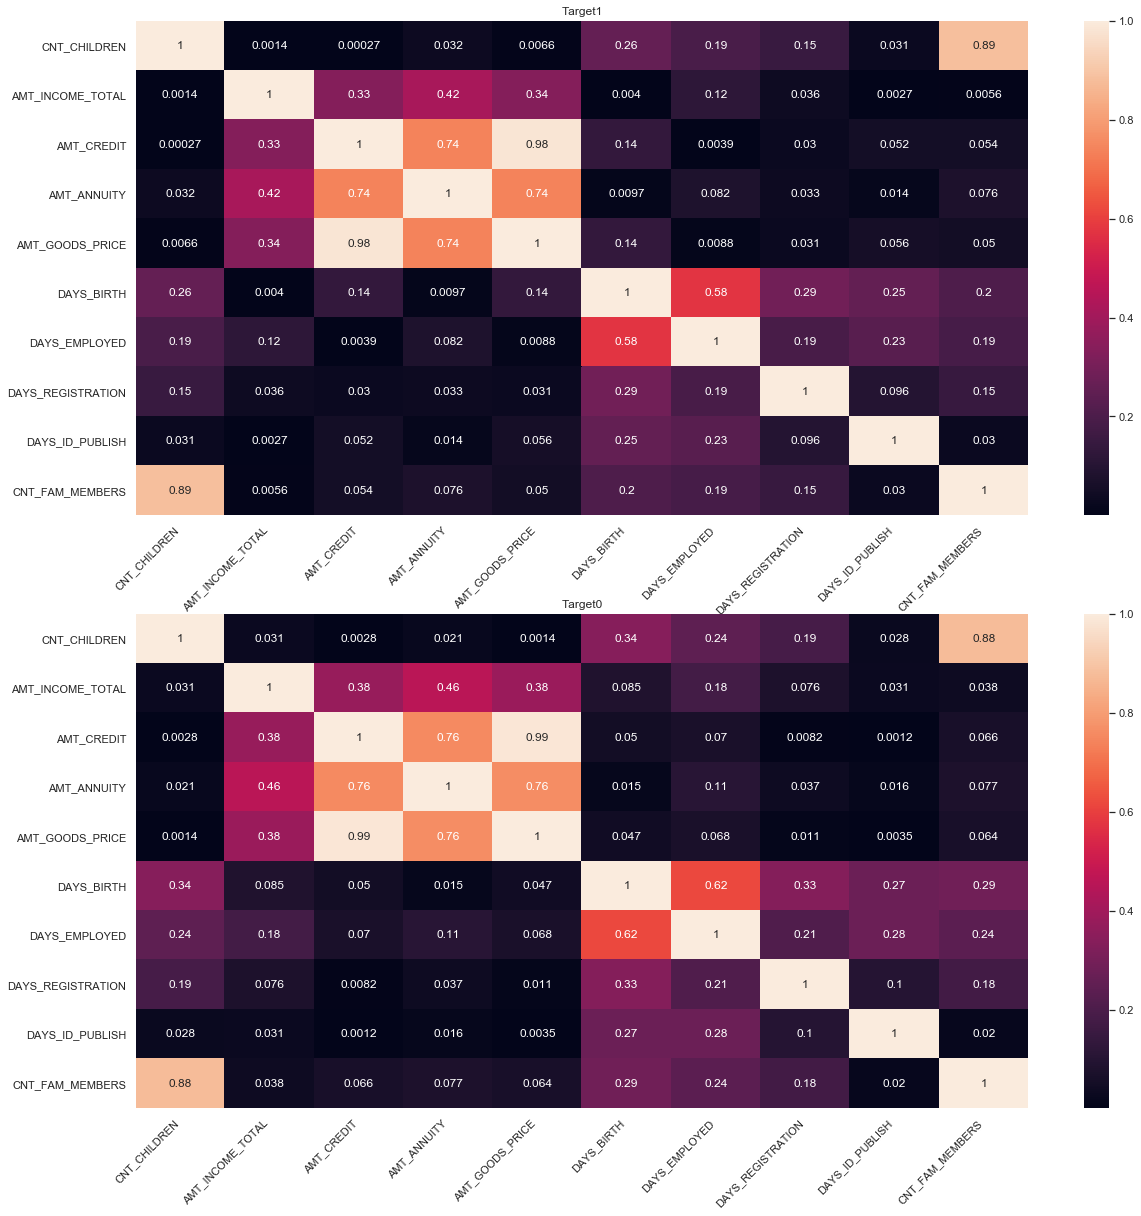

In [241]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
chart= sbn.heatmap(corr_matrixT1,annot=True)
plt.title('Target1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(2,1,2)
chart=sbn.heatmap(corr_matrixT0,annot=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title ('Target0')

In [242]:
corr_matrixT1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.001430,0.000275,0.032215,0.006550,0.260165,0.192748,0.149210,0.030966,0.885197
AMT_INCOME_TOTAL,0.001430,1.000000,0.333670,0.415525,0.335412,0.003973,0.118717,0.036496,0.002660,0.005552
AMT_CREDIT,0.000275,0.333670,1.000000,0.740187,0.981389,0.135747,0.003869,0.030350,0.051749,0.053776
AMT_ANNUITY,0.032215,0.415525,0.740187,1.000000,0.740993,0.009689,0.082092,0.032678,0.013853,0.076332
AMT_GOODS_PRICE,0.006550,0.335412,0.981389,0.740993,1.000000,0.136389,0.008761,0.030662,0.055969,0.049755
DAYS_BIRTH,0.260165,0.003973,0.135747,0.009689,0.136389,1.000000,0.577364,0.289500,0.254700,0.204513
DAYS_EMPLOYED,0.192748,0.118717,0.003869,0.082092,0.008761,0.577364,1.000000,0.189201,0.227028,0.187422
DAYS_REGISTRATION,0.149210,0.036496,0.030350,0.032678,0.030662,0.289500,0.189201,1.000000,0.096339,0.145835
DAYS_ID_PUBLISH,0.030966,0.002660,0.051749,0.013853,0.055969,0.254700,0.227028,0.096339,1.000000,0.030272
CNT_FAM_MEMBERS,0.885197,0.005552,0.053776,0.076332,0.049755,0.204513,0.187422,0.145835,0.030272,1.000000


In [262]:
corrT1=corr_matrixT1.where(np.triu(np.ones(corr_matrixT1.shape),k=1).astype(bool))
corrT1=corrT1.unstack().reset_index()
corrT1.columns= ['VAR1','VAR2','CORRELATION']
corrT1=corrT1.dropna(subset=['CORRELATION'])
corrT1.sort_values('CORRELATION', ascending=False,inplace=True)
corrT1.head(10)

,VAR1,VAR2,CORRELATION
42,AMT_GOODS_PRICE,AMT_CREDIT,0.981389
90,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885197
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.740993
32,AMT_ANNUITY,AMT_CREDIT,0.740187
65,DAYS_EMPLOYED,DAYS_BIRTH,0.577364
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.415525
41,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.335412
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.333670
75,DAYS_REGISTRATION,DAYS_BIRTH,0.289500
50,DAYS_BIRTH,CNT_CHILDREN,0.260165


In [260]:
corrT0=corr_matrixT0.where(np.triu(np.ones(corr_matrixT0.shape),k=1).astype(bool))
corrT0=corrT0.unstack().reset_index()
corrT0.columns= ['VAR1','VAR2','CORRELATION']
corrT0=corrT0.dropna(subset=['CORRELATION'])
corrT0.sort_values('CORRELATION', ascending=False,inplace=True)
corrT0.head(10)


,VAR1,VAR2,CORRELATION
42,AMT_GOODS_PRICE,AMT_CREDIT,0.985430
90,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878181
43,AMT_GOODS_PRICE,AMT_ANNUITY,0.762818
32,AMT_ANNUITY,AMT_CREDIT,0.758093
65,DAYS_EMPLOYED,DAYS_BIRTH,0.620897
31,AMT_ANNUITY,AMT_INCOME_TOTAL,0.459701
41,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.383916
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.378772
50,DAYS_BIRTH,CNT_CHILDREN,0.338123
75,DAYS_REGISTRATION,DAYS_BIRTH,0.334235


`comments on correlation`

After comparing the two data sets for Target = 1 and Target = 0, we find that the sets of correlated columns are same for both the datasets.
AMT_GOODS_PRICE is highly correlated to AMT_CREDIT in both the datasets. Similarly CNT_FAM_MEMBERS is highly correlated to CNT_CHILDREN and so on.


In [292]:
# previous application

previous=pd.read_csv('/Users/suraajhasija/Desktop/Python-Basics/EDA Case Study/previous_application.csv')

In [293]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
previous.shape

(1670214, 37)

In [295]:
previous.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [398]:
null_check=previous.isnull().sum()/len(previous.index)*100
null_check

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [399]:
#columns to drop here
col_to_drop=null_check[null_check >50].index

Index([], dtype='object')

In [298]:
previous.drop(columns=col_to_drop,inplace=True)

In [331]:
#merging of current application with previous application keeping data of current applicants only 
previous['SK_ID_CURR']=previous['SK_ID_CURR'].astype('str')
appT1previous=applT1.merge(previous,on='SK_ID_CURR', how='left' )
appT0previous=applT0.merge(previous,on='SK_ID_CURR', how='left' )

In [332]:
appT1previous.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,average income,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,Business Entity Type 3,0.0,0.0,0.0,0.0,2.0,2.0,average income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,average income,1472630.0,Revolving loans,22500.000,0.0,450000.0,NaN,SATURDAY,14.0,Y,1.0,XAP,Approved,-1172.0,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1.0,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
3,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,average income,2426800.0,Cash loans,11117.700,157500.0,157500.0,157500.0,FRIDAY,15.0,Y,1.0,XNA,Approved,-1467.0,Cash through the bank,XAP,Family,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,high,Cash X-Sell: high,365243.0,-1437.0,-747.0,-1167.0,-1163.0,1.0
4,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,average income,1021215.0,Cash loans,31674.870,675000.0,744498.0,675000.0,FRIDAY,11.0,Y,1.0,XNA,Refused,-1075.0,Cash through the bank,LIMIT,Family,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,36.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
#since no null in previous application NAME_CONTRACT_STATUS. We can assume that where ever we have na,
#means no previous record found
appT1previous.NAME_CONTRACT_STATUS=appT1previous.NAME_CONTRACT_STATUS.fillna('No History')
appT0previous.NAME_CONTRACT_STATUS=appT0previous.NAME_CONTRACT_STATUS.fillna('No History')

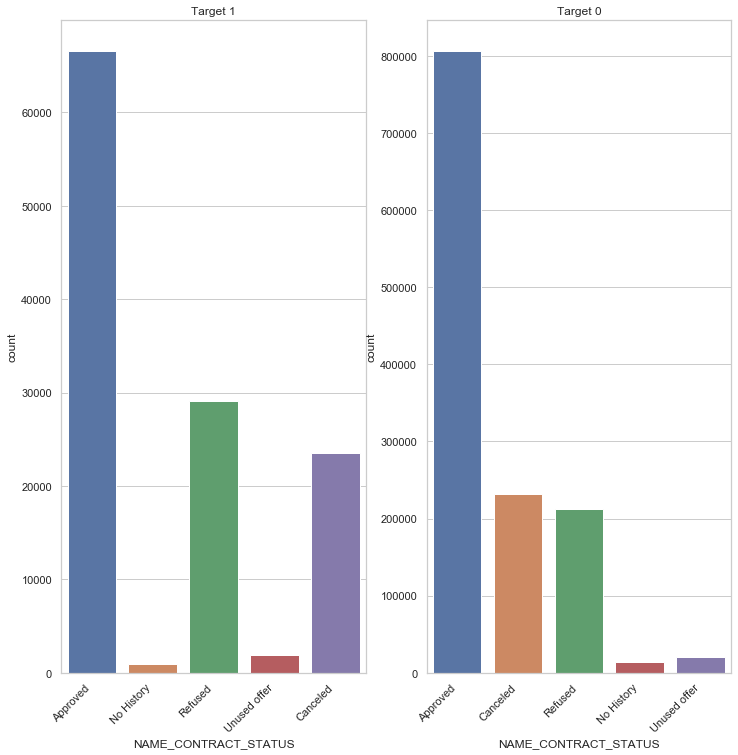

In [381]:
#Customers in current application with previous application contract/loan status 
fig=plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
bbc=sbn.countplot(x='NAME_CONTRACT_STATUS', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,2)
ddc=sbn.countplot(x='NAME_CONTRACT_STATUS', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Target 0')
plt.show()



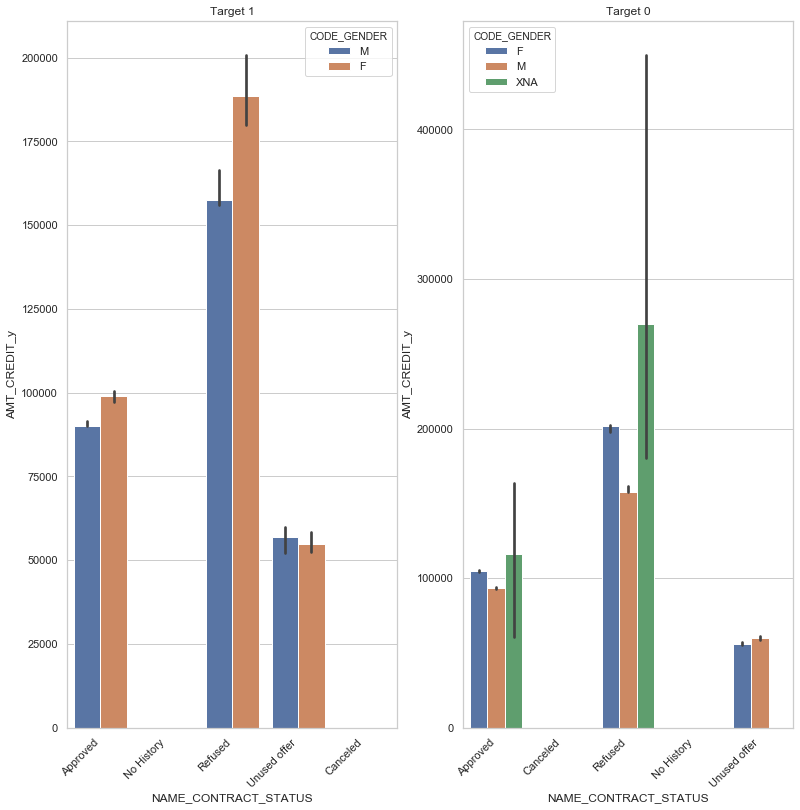

In [386]:
#previous application contract status and median credit amount by gender

fig=plt.figure(figsize=(13,13))

plt.subplot(1,2,1)
bbc=sbn.barplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_y', estimator=np.median,hue='CODE_GENDER', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,2)
ddc=sbn.barplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_y', estimator=np.median, hue='CODE_GENDER', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Target 0')
plt.show()


In [345]:
#validating the chart data
appT1previous.groupby('NAME_CONTRACT_STATUS').aggregate(np.median)['AMT_CREDIT_y']

NAME_CONTRACT_STATUS
Approved         95692.50
Canceled             0.00
No History            NaN
Refused         180000.00
Unused offer     55676.25
Name: AMT_CREDIT_y, dtype: float64

Text(0.5, 1.0, 'Target 0')

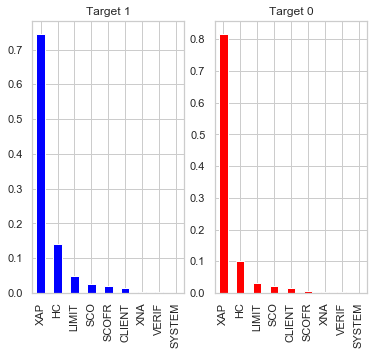

In [372]:
#checking the cause of rejection in previous applications
fig=plt.figure(figsize=(6,5))

plt.subplot(1,2,1)
subset=appT1previous[appT1previous['NAME_CONTRACT_STATUS']=='Refused']
appT1previous.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar(color='blue')
plt.title('Target 1')

plt.subplot(1,2,2)
subset=appT0previous[appT0previous['NAME_CONTRACT_STATUS']=='Refused']

appT0previous.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar(color='red')
plt.title('Target 0')


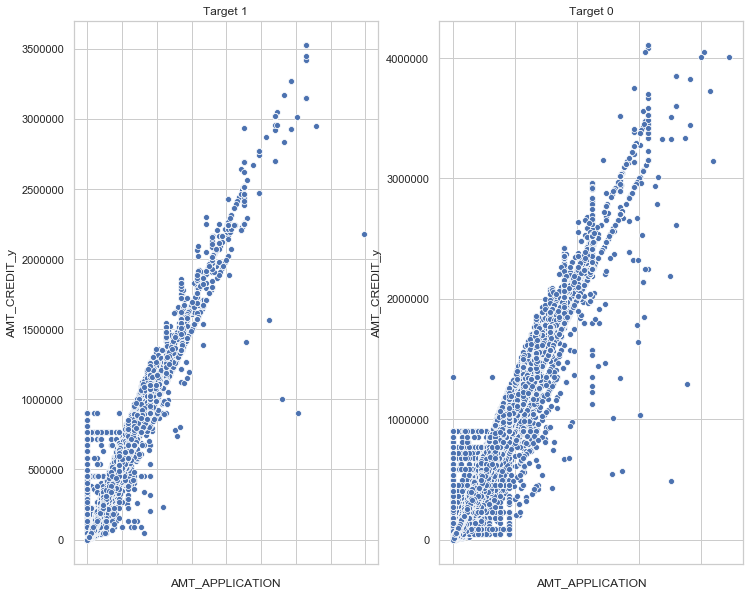

In [384]:
#bivariate analysis - checking the variation between credit amount and the amount for which the client initially applied in the previous application

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
bbc=sbn.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT_y', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,2)
ddc=sbn.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT_y', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 0')
plt.show()

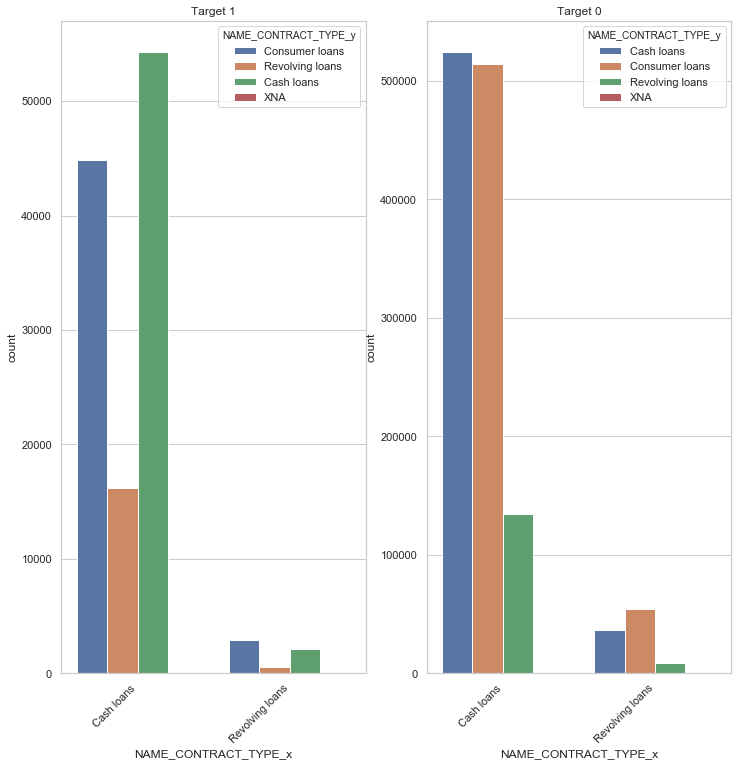

In [390]:
#Shift in contract type (from previous application to current)
#categorical-categorical bivariate analysis


fig=plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
bbc=sbn.countplot(x='NAME_CONTRACT_TYPE_x',hue='NAME_CONTRACT_TYPE_y', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,2)
ddc=sbn.countplot(x='NAME_CONTRACT_TYPE_x',hue='NAME_CONTRACT_TYPE_y', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Target 0')
plt.show()

Remarks and Explanations in PPT attached with this notebook

### Author: `Suraaj Hasija`
### Please share your feedback on: `mailbox.suraaj@gmail.com `